<a href="https://colab.research.google.com/github/hashiramauchiha/Computerscience/blob/master/dphi_travel_insurance_claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader,TensorDataset, random_split
import seaborn as sns
from sklearn.model_selection import train_test_split

In [34]:
DATASET_URl="https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv"
DATA_FILENAME = "Training_set_label.csv"
download_url(DATASET_URl,'.')

Using downloaded and verified file: ./Training_set_label.csv


In [35]:
TEST_DATASET_URL="https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv"
TEST_DATA_FILENAME="Testing_set_label.csv"
download_url(TEST_DATASET_URL,'.')

Using downloaded and verified file: ./Testing_set_label.csv


In [36]:
train_dataset=pd.read_csv(DATA_FILENAME)
train_dataset.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
5,EPX,Travel Agency,Online,2 way Comprehensive Plan,36,"KOREA, REPUBLIC OF",47.0,0.00,NaN,36,0
6,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,THAILAND,25.0,0.00,NaN,36,0
7,EPX,Travel Agency,Online,Cancellation Plan,4,VIET NAM,27.0,0.00,NaN,35,0
8,EPX,Travel Agency,Online,2 way Comprehensive Plan,95,THAILAND,20.0,0.00,NaN,36,0
9,EPX,Travel Agency,Online,Cancellation Plan,30,AUSTRALIA,10.0,0.00,NaN,36,0


In [39]:
df = train_dataset.copy(deep=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [41]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


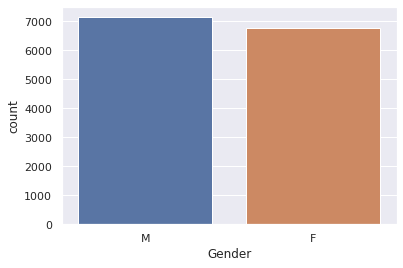

In [42]:
%matplotlib inline
sns.countplot(df['Gender'])


In [43]:
df.value_counts('Gender')

Gender
M    7137
F    6762
dtype: int64

In [44]:
df=df.drop('Gender',axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Age                   48260 non-null  int64  
 9   Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.7+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


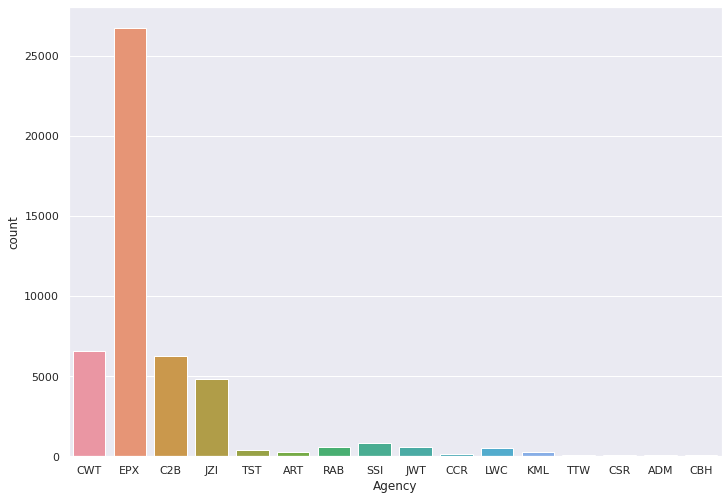

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['Agency'])

In [53]:
categorial_cols = [title for title in df.select_dtypes(exclude=['number']).columns]
categorial_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

In [55]:
for col in categorial_cols:
        df[col] = df[col].astype('category').cat.codes

In [57]:
x=df.drop('Claim',axis=1)
y=df.Claim

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9510
           1       0.21      0.04      0.07       142

    accuracy                           0.98      9652
   macro avg       0.60      0.52      0.53      9652
weighted avg       0.97      0.98      0.98      9652



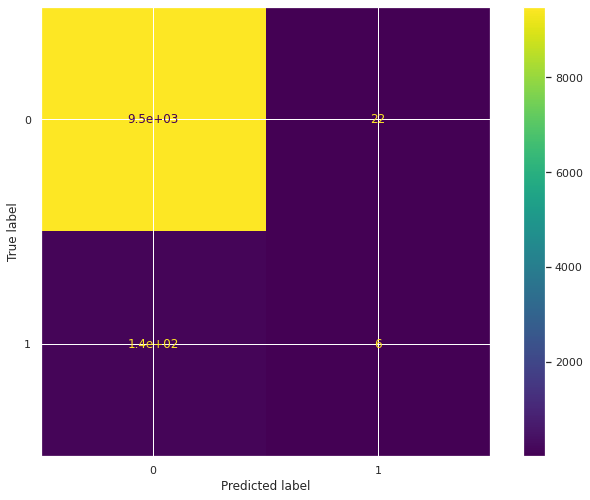

In [71]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,x_test,y_test)

In [72]:
df.Claim.value_counts()

0    47552
1      708
Name: Claim, dtype: int64

In [74]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler(random_state=42)

x_ros,y_ros=ros.fit_resample(x,y)
print('Original dataset shape',Counter(y))
print('Resample dataset shape',Counter(y_ros))

Original dataset shape Counter({0: 47552, 1: 708})
Resample dataset shape Counter({0: 47552, 1: 47552})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=42,stratify=y_ros)

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9511
           1       0.99      1.00      0.99      9510

    accuracy                           0.99     19021
   macro avg       0.99      0.99      0.99     19021
weighted avg       0.99      0.99      0.99     19021



In [92]:
#from sklearn.ensemble import GradientBoostingClassifier

#model=GradientBoostingClassifier()
#model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
#print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      9511
           1       0.80      0.78      0.79      9510

    accuracy                           0.79     19021
   macro avg       0.79      0.79      0.79     19021
weighted avg       0.79      0.79      0.79     19021



In [84]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
d = pd.read_csv(TEST_DATA_FILENAME)
d.head()
test_copy = d.copy(deep=True)
test_copy = d.drop('Gender', axis=1)
cat_cols = [title for title in test_copy.select_dtypes(exclude=['number']).columns]
cat_cols


['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

In [110]:
for col in cat_cols: 
  test_copy[col] = test_copy[col].astype('category').cat.codes

In [114]:
 p = rfc.predict(test_copy)

In [115]:
res = pd.DataFrame(p)

In [116]:
res.index = test_copy.index

In [117]:
res.column = ["predictions"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [118]:
res.to_csv('predictions.csv')

In [119]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [120]:
res.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [121]:
res.value_counts()

0    15758
1       74
dtype: int64